# WHAT WILL MAKE STARBUCKS APP PROMOTIONS MORE SUCCESSFUL?
## *Step 1: Initial Exploratory Data Analysis & EDA*

In [2]:
! pip install --upgrade pip
! pip install pandas
! pip install seaborn
! pip install matplotlib


In [3]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# EXPLORE AND CLEAN PORTFOLIO DATAFRAME
The portfolio dataframe has the following features:
* reward - the amount of value of the discount or product that the customer will receive upon completion of the offer
* channels - the medium in which the promotion was communicated to the user.
* difficulty - the amount the user has to spend in order to complete the promo
* duration - the time in which the user must complete the promo in order to get the reward
* offer type - the type of offer sent tot he user.
    - bogo - buy one get one free
    - discount - the user attains a discount upon completing the offer
    - informational - ongoing Starbucks promotions sent to users

In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
portfolio.shape

(10, 6)

### OBSERVATIONS

* The portfolio dataframe has 10 columns with 6 rows.
* It does not have any null values.
* The channels are written in a list.
* Each row provides a unique offer. 

### ACTIONS
* Create a new column called offer which assigns numbers 1 - 10 for each type of offer. This will be used as offer_id in the final table for better readability.
* Extract each channel from the list of channels
* Use MultiLabelBinarizer to one hot encode list of channels.
* Create a column with duration by hour to match the units of the time indicated in the transactions table.
* Reorganize all columns.

In [6]:
portfolio_df = portfolio.copy()

In [7]:
portfolio_df['offer'] = portfolio.index + 1

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# create an instance of the MultiLabelBinarizer class
mlb = MultiLabelBinarizer()

# fit and transform the column of lists into a binary matrix
encoded = mlb.fit_transform(portfolio_df['channels'])

# create a new DataFrame with the binary matrix
df_encoded = pd.DataFrame(encoded, columns=mlb.classes_)

# concatenate the new DataFrame with the original DataFrame
portfolio_df = pd.concat([portfolio_df, df_encoded], axis=1)

In [9]:
portfolio_df['duration_hr'] = portfolio_df['duration'] * 24

In [10]:
portfolio_df = portfolio_df[["id", "offer", "offer_type", "difficulty", "duration", "duration_hr", "reward", "channels", "web", "email", "social", "mobile"]]

In [150]:
portfolio_df[['offer', 'id']]

,offer,id
0,1,ae264e3637204a6fb9bb56bc8210ddfd
1,2,4d5c57ea9a6940dd891ad53e9dbe8da0
2,3,3f207df678b143eea3cee63160fa8bed
3,4,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,6,2298d6c36e964ae4a3e7e9706d1fb8c2
6,7,fafdcd668e3743c1bb461111dcafc2a4
7,8,5a8bc65990b245e5a138643cd4eb9837
8,9,f19421c1d4aa40978ebb69ca19b0e20d
9,10,2906b810c7d4411798c6938adc9daaa5


In [12]:
# portfolio_df.to_csv('data/portfolio_df.csv', index = False)

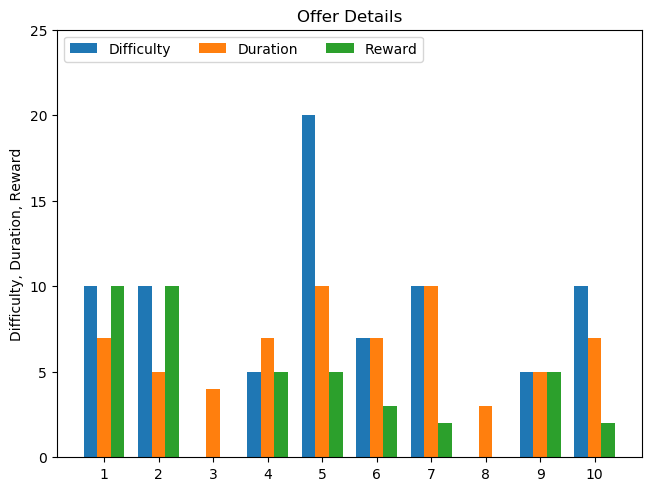

In [13]:
offers = tuple(list(portfolio_df.offer))
offer_details = {
    'Difficulty': list(portfolio['difficulty']),
    'Duration': list(portfolio['duration']),
    'Reward': list(portfolio['reward']),
}
x_labels = offers

x = np.arange(len(offers))  
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in offer_details.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difficulty, Duration, Reward')
ax.set_title('Offer Details')
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 25)

plt.show()

# plt.savefig(os.path.join('photos/diff_duration_reward.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

>The graph above shows that there the value of difficulty and reward are not always proportional. 

* Offers 1, 2, 4 and 9 are BOGO promotions. For these promotions, the reward and difficulty are always equal as they are 'Buy 1 Get 1 Free' offers. There is also a good variation of duration for these offers. 

* Offers 5, 6, 7, and 10 are discount offers. For these offer, the difficulty is much higher than the reward. As the difficulty is the amount that needs to be spent to attain the discount, this makes complete sense as the reward is merely a deduction from the purchase made. with the exception of offer # 10, discount durations usually have a longer duration than BOGO offers.

* Information offers just advertise ongoing promotions so they do not have values for difficulty or reward. 

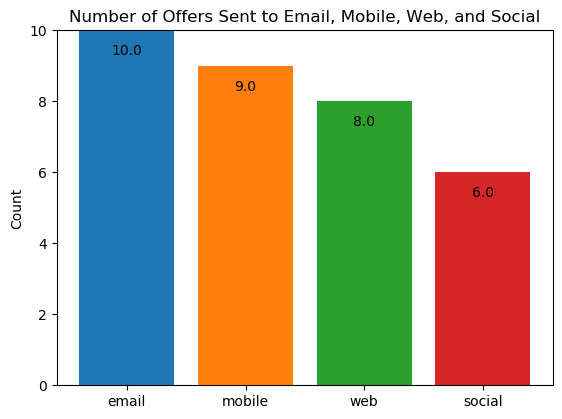

In [14]:
# create sample data
data = {
    'email': list(portfolio_df['email']),
    'mobile': list(portfolio_df['mobile']),
    'web': list(portfolio_df['web']),
    'social': list(portfolio_df['social'])
}

df = pd.DataFrame(data)


value_counts = df.apply(pd.Series.value_counts)

x_labels = value_counts.columns
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects = ax.bar(x, value_counts.loc[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -20),  
                textcoords="offset points",
                ha='center', va='bottom')


ax.set_ylabel('Count')
ax.set_title('Number of Offers Sent to Email, Mobile, Web, and Social')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, len(df))

plt.subplots_adjust(top=0.85)

plt.show()

# plt.savefig(os.path.join('photos/offer_channels.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

>The graph shows that most of the offers are sent through email followed by the mobile app.

# Exploration and Cleaning of Profile Dataframe
The profile dataframe consists of 17000 rows and 5 columns: gender, age, user id, the date when the user became a member and the income of the user.

In [15]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [16]:
profile.shape

(17000, 5)

In [17]:
len(profile.id.unique())

17000

In [18]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [19]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


### OBSERVATIONS
* The dataframe contains NaN values.
* There are ages equal to 118. 

### ACTIONS
* Remove NA values.
* Remove ages that are equal to 118.
* Find the membership duration in days using the difference between the maximum 'became member on' date and the actual 'became member on' date
* Rearrange the columns.
* Save the new table to csv


In [20]:
profile_df = profile.dropna()

In [21]:
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'].astype(str), format='%Y%m%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
print(min(profile_df['became_member_on']))
print(max(profile_df['became_member_on']))

2013-07-29 00:00:00
2018-07-26 00:00:00


In [23]:
profile_df['membership_duration'] = round((max(profile_df['became_member_on']) - profile_df["became_member_on"]).dt.days) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
profile_df.shape

(14825, 6)

In [25]:
len(profile_df['id'].unique())

14825

In [26]:
profile_df = profile_df[["id", "age", "gender", "income", "became_member_on", "membership_duration"]]

In [27]:
profile_df.head()

,id,age,gender,income,became_member_on,membership_duration
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443
5,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91
8,389bc3fa690240e798340f5a15918d5c,65,M,53000.0,2018-02-09,167
12,2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,2017-11-11,257


In [28]:
# profile_df.to_csv('profile_df.csv', index = False)

In [ ]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data = profile_df,
    x=profile_df['age'], 
    hue=profile_df['gender'],
    fill=True, 
    common_norm=False, 
    palette="RdPu",
    alpha=.5, 
    linewidth=0,
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Age and Gender Distribution of Starbucks Customers')
plt.show()

# plt.savefig(os.path.join('photos/age_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

![Age Distribution by Gender](photos/eda_age_gender.png)

<Axes: title={'center': 'Gender of Starbucks Customers'}, ylabel='gender'>

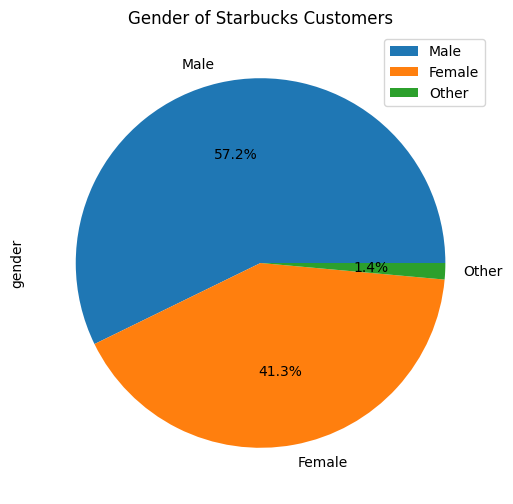

In [28]:
profile_df['gender'].value_counts().plot.pie(legend = True, 
                                             labels = ['Male', 'Female', 'Other'], 
                                             figsize=(11, 6),
                                             title = 'Gender of Starbucks Customers',
                                             autopct='%1.1f%%'
                                            )

# plt.savefig(os.path.join('photos/gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

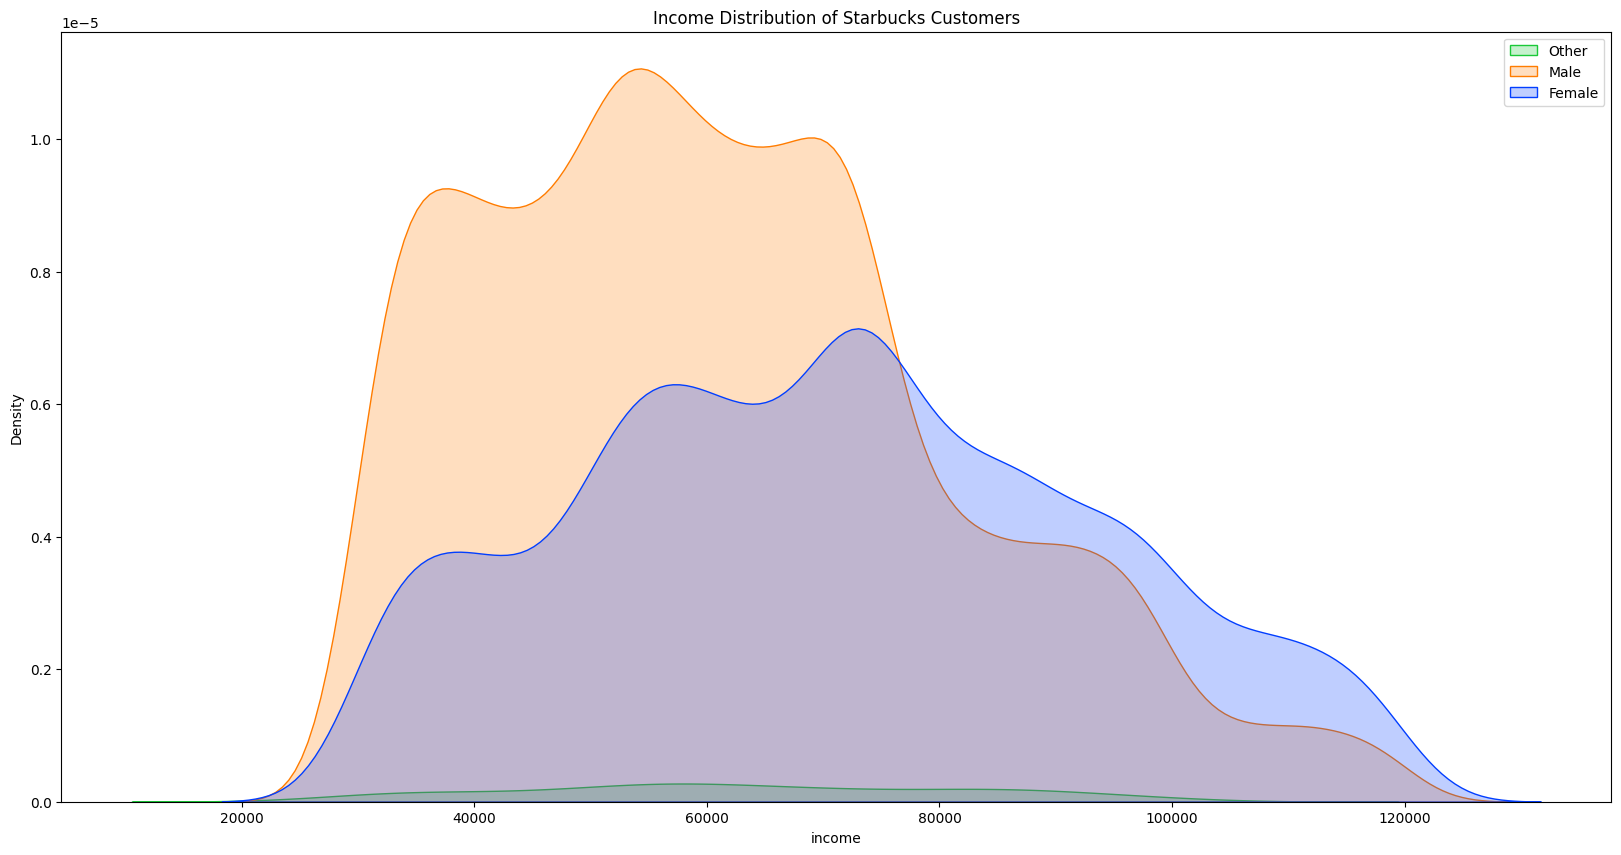

In [30]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data=profile_df, 
    x="income", 
    hue="gender",
    fill = True,
    palette="bright"
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Income Distribution of Starbucks Customers')
plt.show()

# plt.savefig(os.path.join('photos/income_distribution.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

The three graphs above show that:

* The app has more male users than female users. 
* There are more males aged 18 to 40 than there are females.
* The majority of the users are between 45 to 73 years of age.
* Female users have a higher income than the male users.
* Majority of the users earn around 49,000 to 80,000.

# Transcript Dataframe
The transcript dataframe would probably be the most complex among all the dataframes included in this project. It contains the following:

* event (str) - record description (transaction, offer received, offer viewed, offer completed)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - consists of an offer id for offer received and viewed, an offer id and reward for offer completed, and the amount spent for transactions.  

Transaction events contain a value for amount spent. Both offer received and offer viewed contain the offer id, whereas offer completed contains both the offer id and the reward received.

In [30]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [31]:
len(transcript['person'].unique())

17000

In [32]:
len(profile_df['id'].unique())

14825

In [33]:
len(profile['id'].unique())

17000

In [34]:
not_in_profile = set(transcript['person']) - set(profile_df['id'])
print("Number of persons not in profile:", len(not_in_profile))

Number of persons not in profile: 2175


In [35]:
not_in_profile = set(transcript['person']) - set(profile_df['id'])
num_entries_not_in_profile = sum(transcript['person'].isin(not_in_profile))
print("Number of entries with person not in profile:", num_entries_not_in_profile)

Number of entries with person not in profile: 33772


In [36]:
306534 - 33772

272762

In [37]:
transcript.shape

(306534, 4)

> As profile_df has all the unique values for id, a left join to profile_df will remove all the rows with the persons that are not in profile_df.

In [38]:
transcript_df = transcript.copy()

In [39]:
transcript_profile = pd.merge(
    profile_df,
    transcript_df,
    how = "left",
    left_on = "id",
    right_on = "person"
)

In [40]:
transcript_profile.shape

(272762, 10)

In [41]:
transcript_profile.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [42]:
transcript_profile.head(5)

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528


In [43]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [44]:
transcript_profile.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

## Transaction
* Create a dataframe for transactions.
* Extract the amount spent for each transaction.

In [45]:
transcript_profile[transcript_profile.event == 'transaction'].head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144


In [46]:
transaction_df = transcript_profile[transcript_profile.event == 'transaction']
transaction_df.shape

(123957, 10)

In [47]:
transcript_profile.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [48]:
transaction_df['amount_spent'] = transaction_df['value'].apply(lambda x: x['amount'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
transaction_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,amount_spent
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18,21.51
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144,32.28
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528,23.22
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,19.89
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,17.78


In [50]:
transaction_df = transaction_df.drop('value', axis = 1)

In [51]:
transaction_df.drop_duplicates()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,528,23.22
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78
...,...,...,...,...,...,...,...,...,...,...
272752,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,84,25.19
272753,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,96,21.53
272756,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,480,30.57
272758,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47


In [52]:
transaction_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
amount_spent           0
dtype: int64

In [53]:
transaction_df = transaction_df.dropna()

In [54]:
transaction_df.shape

(123957, 10)

In [51]:
# transaction_df.to_csv('data/transaction.csv', index = False)

## Offer Received, Viewed, Completed
* Create separate dataframes for offer received, offer viewed and offer completed.
* Extract and feature engineer new columns for the keys in the values column.

In [399]:
offer_received_df = transcript_profile[transcript_profile.event == 'offer received']
offer_viewed_df = transcript_profile[transcript_profile.event == 'offer viewed']
offer_completed_df = transcript_profile[transcript_profile.event == 'offer completed']

In [400]:
print(offer_received_df.shape)
print(offer_viewed_df.shape)
print(offer_completed_df.shape)

(66501, 10)
(49860, 10)
(32444, 10)


In [401]:
offer_received_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [402]:
offer_received_df['offer_id'] = offer_received_df['value'].apply(lambda x: x['offer id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [403]:
offer_received_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,offer_id
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,3f207df678b143eea3cee63160fa8bed
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
11,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837
16,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},408,ae264e3637204a6fb9bb56bc8210ddfd


In [404]:
offer_received_df.drop('value', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [405]:
offer_received_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,offer_id
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
11,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837
16,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd


In [406]:
offer_viewed_df['offer_id'] = offer_viewed_df['value'].apply(lambda x: x['offer id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [407]:
offer_viewed_df.drop('value', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [408]:
offer_viewed_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,offer_id
7,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9
12,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837
17,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408,ae264e3637204a6fb9bb56bc8210ddfd
23,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,582,f19421c1d4aa40978ebb69ca19b0e20d
25,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91,e2127556f4f64592b11af22de27a7932,offer viewed,18,2906b810c7d4411798c6938adc9daaa5


In [409]:
offer_completed_df['offer_id'] = offer_completed_df['value'].apply(lambda x: x['offer_id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [410]:
offer_completed_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,offer_id
5,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528,9b98b8c7a33c4b65b9aebfe6a799e6d9
9,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,9b98b8c7a33c4b65b9aebfe6a799e6d9
20,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510,ae264e3637204a6fb9bb56bc8210ddfd
21,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,510,f19421c1d4aa40978ebb69ca19b0e20d
34,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91,e2127556f4f64592b11af22de27a7932,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,522,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [411]:
not_viewed = set(offer_received_df['offer_id']) - set(offer_viewed_df['offer_id'])
num_not_viewed = len(not_viewed)
print("Number of offers not viewed:", num_not_viewed)
offer_received_df.isna().sum()

Number of offers not viewed: 0


id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
offer_id               0
dtype: int64

In [412]:
offer_viewed_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
offer_id               0
dtype: int64

In [413]:
not_in_viewed = set(offer_received_df['offer_id']) - set(offer_viewed_df['offer_id'])
num_entries_not_in_viewed= sum(offer_received_df['offer_id'].isin(not_in_viewed))
print("Number of entries with offers not viewed:", num_entries_not_in_viewed)

Number of entries with offers not viewed: 0


In [414]:
merged_received = offer_received_df.copy()

In [415]:
merged_received['id_o'] = merged_received.index

In [416]:
merged_viewed = offer_viewed_df.copy()

> Now that all the values have been extracted, the three tables will be merged. The challenge here will be the fact that a person can have the same offer, rendering our uniqe values ununique. In this case, looking into the consistency of timings will be part of the process later. Timings should follow the flow: received -> viewed or received -> viewed -> completed. 

In [417]:
received_viewed_completed = pd.merge(
    merged_received,
    merged_viewed,
    how = "left",
    on = ["person", "offer_id", "age", "gender", "income", "became_member_on", "membership_duration"],
    indicator = True,
)

In [418]:
received_viewed_completed.shape

(82834, 15)

In [419]:
received_viewed_completed.head()

,id_x,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,id_o,id_y,event_y,time_y,_merge
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,NaN,NaN,NaN,left_only
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,3,NaN,NaN,NaN,left_only
2,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6.0,both
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,11,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216.0,both
4,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,16,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408.0,both


In [420]:
received_viewed_completed.isna().sum()

id_x                       0
age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
event_x                    0
time_x                     0
offer_id                   0
id_o                       0
id_y                   14403
event_y                14403
time_y                 14403
_merge                     0
dtype: int64

In [421]:
condition_met = all(received_viewed_completed['id_x'] == received_viewed_completed['person'])
if condition_met:
    print("All values in the 'id_x' and 'person' columns are equal.")
else:
    print("There are some values in the 'id_x' and 'person' columns that are not equal.")

All values in the 'id_x' and 'person' columns are equal.


In [422]:
condition_met = all(received_viewed_completed['id_y'] == received_viewed_completed['id_x'])
if condition_met:
    print("All values in the 'id_x' and 'person' columns are equal.")
else:
    print("There are some values in the 'id_x' and 'person' columns that are not equal.")

There are some values in the 'id_x' and 'person' columns that are not equal.


In [423]:
num_not_equal = sum(received_viewed_completed['id_y'] != received_viewed_completed['id_x'])
print("Number of values that are not equal:", num_not_equal)

Number of values that are not equal: 14403


In [424]:
received_viewed_completed = received_viewed_completed.drop(['id_x', 'id_y'], axis = 1)

In [425]:
received_viewed_completed.drop_duplicates(subset = 'id_o', keep = 'first', inplace = True)

In [426]:
received_viewed_completed.shape

(66501, 13)

In [427]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,id_o,event_y,time_y,_merge
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,NaN,NaN,left_only
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,3,NaN,NaN,left_only
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer viewed,6.0,both
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,11,offer viewed,216.0,both
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,16,offer viewed,408.0,both


In [428]:
merged_completed = offer_completed_df.copy()

In [429]:
received_viewed_completed = pd.merge(
    received_viewed_completed,
    merged_completed,
    how = 'left',
    on = ["person", "offer_id", "age", "gender", "income", "became_member_on", "membership_duration"]
)

In [430]:
received_viewed_completed.shape

(76469, 17)

In [431]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,id_o,event_y,time_y,_merge,id,event,value,time
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,NaN,NaN,left_only,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,3,NaN,NaN,left_only,NaN,NaN,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer viewed,6.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,11,offer viewed,216.0,both,NaN,NaN,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,16,offer viewed,408.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510.0


In [432]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
event_x                    0
time_x                     0
offer_id                   0
id_o                       0
event_y                15081
time_y                 15081
_merge                     0
id                     31884
event                  31884
value                  31884
time                   31884
dtype: int64

In [433]:
recieved_viewed_completed = received_viewed_completed.rename(columns={'event_x': 'offer_received', 'time_x': 'time_received', 'event_y': 'offer_viewed', 'time_y': 'time_viewed', 'event': 'offer_completed', 'time': 'time_completed'}, inplace = True)

In [434]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
offer_received             0
time_received              0
offer_id                   0
id_o                       0
offer_viewed           15081
time_viewed            15081
_merge                     0
id                     31884
offer_completed        31884
value                  31884
time_completed         31884
dtype: int64

In [435]:
received_viewed_completed.drop_duplicates(subset = 'id_o', keep = 'first', inplace = True)

In [436]:
received_viewed_completed.shape

(66501, 17)

In [437]:
received_viewed_completed['offer_viewed'] = received_viewed_completed['offer_viewed'].fillna(0)

In [438]:
received_viewed_completed.loc[received_viewed_completed['offer_viewed'] == 'offer viewed', 'offer_viewed'] = 1

In [439]:
received_viewed_completed['offer_viewed'].value_counts()

1    52098
0    14403
Name: offer_viewed, dtype: int64

In [440]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,id_o,offer_viewed,time_viewed,_merge,id,offer_completed,value,time_completed
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,0,NaN,left_only,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,3,0,NaN,left_only,NaN,NaN,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,1,6.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,11,1,216.0,both,NaN,NaN,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,16,1,408.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510.0


In [441]:
received_viewed_completed['offer_completed'] = received_viewed_completed['offer_completed'].fillna(0)

In [442]:
received_viewed_completed.loc[received_viewed_completed['offer_completed'] == 'offer completed', 'offer_completed'] = 1

In [443]:
received_viewed_completed['offer_completed'].value_counts()

1    34617
0    31884
Name: offer_completed, dtype: int64

In [444]:
received_viewed_completed.loc[received_viewed_completed['offer_received'] == 'offer received', 'offer_received'] = 1

In [445]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
offer_received             0
time_received              0
offer_id                   0
id_o                       0
offer_viewed               0
time_viewed            14403
_merge                     0
id                     31884
offer_completed            0
value                  31884
time_completed         31884
dtype: int64

In [446]:
received_viewed_completed['reward_received'] = received_viewed_completed[received_viewed_completed.offer_completed == 1]['value'].apply(lambda x: x['reward'])

In [447]:
received_viewed_completed.drop(['id', 'value'], axis = 1, inplace = True)

In [448]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,id_o,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,0,NaN,left_only,1,528.0,5.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,504,3f207df678b143eea3cee63160fa8bed,3,0,NaN,left_only,0,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,1,6.0,both,1,132.0,5.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,11,1,216.0,both,0,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,16,1,408.0,both,1,510.0,10.0


> To ensure data quality, inconsistencies need to be removed by comparing the times that the offer was received, viewed and completed

> The offer cannot be viewed before it was received. Time viewed cannot be less than time received.

In [449]:
# Identify the index of the rows that match the condition
received_viewed_inconsistencies = received_viewed_completed[received_viewed_completed.time_viewed < received_viewed_completed.time_received].index
print(received_viewed_inconsistencies)

# Drop the rows with the identified indices
received_viewed_completed.drop(index=received_viewed_inconsistencies, inplace=True)

Int64Index([   14,    15,    37,    40,    43,    58,    61,    69,    72,
               75,
            ...
            76338, 76344, 76357, 76363, 76377, 76383, 76394, 76422, 76427,
            76435],
           dtype='int64', length=8626)


>The offer cannot be completed before it was received

In [450]:
len(received_viewed_completed[received_viewed_completed.time_completed < received_viewed_completed.time_received])

720

In [451]:
# Identify the index of the rows that match the condition
received_completed_inconsistencies = received_viewed_completed[received_viewed_completed.time_completed < received_viewed_completed.time_received].index
print(received_completed_inconsistencies)

# Drop the rows with the identified indices
received_viewed_completed.drop(index=received_completed_inconsistencies, inplace=True)

Int64Index([   30,   276,   482,   783,   850,  1135,  1264,  1283,  1290,
             1307,
            ...
            75345, 75407, 75568, 75652, 75888, 76173, 76234, 76407, 76411,
            76452],
           dtype='int64', length=720)


In [452]:
received_viewed_completed['offer_viewed'].value_counts()

1    43169
0    13986
Name: offer_viewed, dtype: int64

In [453]:
received_viewed_completed['time_viewed'].isna().sum()

13986

In [454]:
received_viewed_completed['offer_completed'].value_counts()

0    28718
1    28437
Name: offer_completed, dtype: int64

In [455]:
received_viewed_completed['time_completed'].isna().sum()

28718

In [456]:
received_viewed_completed.shape

(57155, 16)

In [457]:
received_viewed_completed['reward_received'] = received_viewed_completed['reward_received'].fillna(0)

In [458]:
received_viewed_completed['time_viewed'] = received_viewed_completed['time_viewed'].fillna(0)

In [459]:
received_viewed_completed['time_completed'] = received_viewed_completed['time_completed'].fillna(0)

In [460]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,id_o,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,2,0,0.0,left_only,1,528.0,5.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,504,3f207df678b143eea3cee63160fa8bed,3,0,0.0,left_only,0,0.0,0.0
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,1,6.0,both,1,132.0,5.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,11,1,216.0,both,0,0.0,0.0
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,16,1,408.0,both,1,510.0,10.0


In [461]:
received_viewed_completed.isna().sum()

age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
offer_received         0
time_received          0
offer_id               0
id_o                   0
offer_viewed           0
time_viewed            0
_merge                 0
offer_completed        0
time_completed         0
reward_received        0
dtype: int64

In [462]:
complete_df = pd.merge(
    portfolio_df,
    received_viewed_completed,
    how = 'inner',
    left_on = 'id',
    right_on = 'offer_id'
)

In [463]:
complete_df.shape

(57155, 28)

In [464]:
complete_df.head()

,id,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,...,offer_received,time_received,offer_id,id_o,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,1,408,ae264e3637204a6fb9bb56bc8210ddfd,16,1,408.0,both,1,510.0,10.0
1,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,1,408,ae264e3637204a6fb9bb56bc8210ddfd,74,1,432.0,both,1,426.0,10.0
2,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,1,408,ae264e3637204a6fb9bb56bc8210ddfd,93,1,414.0,both,0,0.0,0.0
3,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,1,408,ae264e3637204a6fb9bb56bc8210ddfd,130,1,414.0,both,1,486.0,10.0
4,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,1,408,ae264e3637204a6fb9bb56bc8210ddfd,160,1,438.0,both,0,0.0,0.0


In [465]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57155 entries, 0 to 57154
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   57155 non-null  object        
 1   offer                57155 non-null  int64         
 2   offer_type           57155 non-null  object        
 3   difficulty           57155 non-null  int64         
 4   duration             57155 non-null  int64         
 5   duration_hr          57155 non-null  int64         
 6   reward               57155 non-null  int64         
 7   channels             57155 non-null  object        
 8   web                  57155 non-null  int64         
 9   email                57155 non-null  int64         
 10  social               57155 non-null  int64         
 11  mobile               57155 non-null  int64         
 12  age                  57155 non-null  int64         
 13  gender               57155 non-

In [466]:
complete_df.drop(['id', '_merge'], axis = 1, inplace = True)

In [467]:
complete_df.drop_duplicates(subset = 'id_o', keep = 'first', inplace = True)

In [392]:
# complete_df = pd.read_csv('data/complete.csv')

In [468]:
complete_df['received_viewed'] =  complete_df['time_viewed'] - complete_df['time_received']

In [469]:
complete_df['viewed_completed'] = complete_df['time_completed'] - complete_df['time_viewed']

In [470]:
complete_df['received_completed_diff'] =  complete_df['time_completed'] - complete_df['time_received']

In [471]:
complete_df['duration_diff'] = complete_df['duration_hr'] - complete_df['received_completed_diff']

In [472]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,id_o,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff
0,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,16,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0
1,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,74,1,432.0,1,426.0,10.0,24.0,-6.0,18.0,150.0
2,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,93,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0
3,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,130,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0
4,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,160,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0


> Although the time viewed can be 0, the offer cannot be completed before it was viewed. Therefore, time completed cannot be greater than time viewed.

In [474]:
viewed_completed_anomalies = complete_df[(complete_df.time_viewed > complete_df.time_completed) & (complete_df.time_completed != 0)].index
complete_df.drop(index = viewed_completed_anomalies, inplace = True)

> The user should not receive a reward if the offer was completed after the offer duration is over.

In [475]:
completed_reward_anomalies = complete_df[(complete_df.offer_completed == 1) & (complete_df.duration_diff < 0) & (complete_df.reward_received > 0)].index
complete_df.drop(index = completed_reward_anomalies, inplace = True)

> The reward indicated in the portfolio should be the same as the reward received if the offer is not informational

In [476]:
reward_anomaly = complete_df[(complete_df.offer_type != 'informational') & (complete_df.reward != complete_df.reward_received) & (complete_df.duration_hr >= complete_df.duration_diff)].index
complete_df.drop(index = reward_anomaly, inplace = True)

In [477]:
complete_df.shape

(49035, 30)

In [478]:
complete_df['viewed_and_completed'] = ((complete_df['offer_viewed'] == 1) & complete_df["offer_completed"] == 1)

In [479]:
complete_df['valid_complete'] = complete_df['viewed_and_completed'].apply(lambda x: 1 if x is True else 0)

In [480]:
complete_df.drop('viewed_and_completed', axis = 1, inplace = True)

In [481]:
complete_df['valid_complete'].value_counts()

0    29817
1    19218
Name: valid_complete, dtype: int64

In [482]:
complete_df['offer_type'].value_counts()

discount         19376
bogo             17992
informational    11667
Name: offer_type, dtype: int64

In [483]:
complete_df.shape

(49035, 31)

In [484]:
complete_df[complete_df.offer_type == 'informational'][['offer_received', 'offer_viewed', 'offer_completed']]

,offer_received,offer_viewed,offer_completed
11151,1,0,0
11152,1,0,0
11153,1,0,0
11154,1,0,0
11155,1,1,0
...,...,...,...
45852,1,1,0
45853,1,1,0
45854,1,1,0
45855,1,1,0


In [485]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0,1
2,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0,0
3,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0,1
4,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0,0
6,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,...,0,0.0,1,522.0,10.0,-504.0,522.0,18.0,150.0,0


In [495]:
# complete_df.to_csv('data/complete.csv', index = False)

In [487]:
offer_received_df['offer_id'].value_counts()

0b1e1539f2cc45b7b9fa7c272da2e1d7    6726
9b98b8c7a33c4b65b9aebfe6a799e6d9    6685
ae264e3637204a6fb9bb56bc8210ddfd    6683
3f207df678b143eea3cee63160fa8bed    6657
2298d6c36e964ae4a3e7e9706d1fb8c2    6655
fafdcd668e3743c1bb461111dcafc2a4    6652
5a8bc65990b245e5a138643cd4eb9837    6643
2906b810c7d4411798c6938adc9daaa5    6631
4d5c57ea9a6940dd891ad53e9dbe8da0    6593
f19421c1d4aa40978ebb69ca19b0e20d    6576
Name: offer_id, dtype: int64

In [488]:
offer_viewed_df['offer_id'].value_counts()

fafdcd668e3743c1bb461111dcafc2a4    6407
2298d6c36e964ae4a3e7e9706d1fb8c2    6379
4d5c57ea9a6940dd891ad53e9dbe8da0    6329
f19421c1d4aa40978ebb69ca19b0e20d    6310
ae264e3637204a6fb9bb56bc8210ddfd    5901
5a8bc65990b245e5a138643cd4eb9837    5873
9b98b8c7a33c4b65b9aebfe6a799e6d9    3499
3f207df678b143eea3cee63160fa8bed    3487
2906b810c7d4411798c6938adc9daaa5    3460
0b1e1539f2cc45b7b9fa7c272da2e1d7    2215
Name: offer_id, dtype: int64

In [489]:
offer_completed_df['offer_id'].value_counts()

fafdcd668e3743c1bb461111dcafc2a4    5003
2298d6c36e964ae4a3e7e9706d1fb8c2    4886
9b98b8c7a33c4b65b9aebfe6a799e6d9    4188
f19421c1d4aa40978ebb69ca19b0e20d    4103
2906b810c7d4411798c6938adc9daaa5    3911
ae264e3637204a6fb9bb56bc8210ddfd    3657
0b1e1539f2cc45b7b9fa7c272da2e1d7    3386
4d5c57ea9a6940dd891ad53e9dbe8da0    3310
Name: offer_id, dtype: int64

In [490]:
complete_df['offer_id'].value_counts()

3f207df678b143eea3cee63160fa8bed    6027
5a8bc65990b245e5a138643cd4eb9837    5640
0b1e1539f2cc45b7b9fa7c272da2e1d7    5184
fafdcd668e3743c1bb461111dcafc2a4    4848
2906b810c7d4411798c6938adc9daaa5    4683
2298d6c36e964ae4a3e7e9706d1fb8c2    4661
9b98b8c7a33c4b65b9aebfe6a799e6d9    4655
4d5c57ea9a6940dd891ad53e9dbe8da0    4481
ae264e3637204a6fb9bb56bc8210ddfd    4448
f19421c1d4aa40978ebb69ca19b0e20d    4408
Name: offer_id, dtype: int64

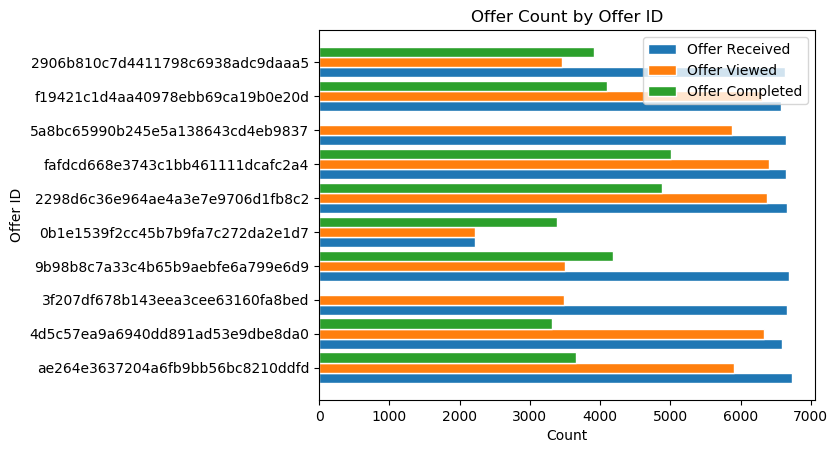

In [491]:
import matplotlib.pyplot as plt
import numpy as np

# Define the offer_ids in the desired order
offer_ids = [
    'ae264e3637204a6fb9bb56bc8210ddfd',
    '4d5c57ea9a6940dd891ad53e9dbe8da0',
    '3f207df678b143eea3cee63160fa8bed',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7',
    '2298d6c36e964ae4a3e7e9706d1fb8c2',
    'fafdcd668e3743c1bb461111dcafc2a4',
    '5a8bc65990b245e5a138643cd4eb9837',
    'f19421c1d4aa40978ebb69ca19b0e20d',
    '2906b810c7d4411798c6938adc9daaa5'
]

# Define the count of each offer_id in the offer_received_df dataframe
offer_received_counts = [6726, 6593, 6657, 6685, 2215, 6655, 6652, 6643, 6576, 6631]

# Define the count of each offer_id in the offer_viewed_df dataframe
offer_viewed_counts = [5901, 6329, 3487, 3499, 2215, 6379, 6407, 5873, 6310, 3460]

# Define the count of each offer_id in the offer_completed_df dataframe
offer_completed_counts = [3657, 3310, 0, 4188, 3386, 4886, 5003, 0, 4103, 3911]

# Set the width of the bars
bar_width = 0.3

# Set the position of the bars on the x-axis
r1 = np.arange(len(offer_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the horizontal bar graph
plt.barh(r1, offer_received_counts, height=bar_width, edgecolor='white', label='Offer Received')
plt.barh(r2, offer_viewed_counts, height=bar_width, edgecolor='white', label='Offer Viewed')
plt.barh(r3, offer_completed_counts, height=bar_width, edgecolor='white', label='Offer Completed')

# Add the x-axis label, y-axis label, and title
plt.xlabel('Count')
plt.ylabel('Offer ID')
plt.title('Offer Count by Offer ID')

# Set the y-axis ticks and labels
plt.yticks([r + bar_width for r in range(len(offer_ids))], offer_ids)

# Add a legend
plt.legend()

# Show the plot
# plt.show()

# plt.savefig(os.path.join('photos/eda_offers_received_viewed_completed.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [282]:
# 5a8bc65990b245e5a138643cd4eb9837    7515
# 3f207df678b143eea3cee63160fa8bed    6949
# fafdcd668e3743c1bb461111dcafc2a4    6474
# 2298d6c36e964ae4a3e7e9706d1fb8c2    5949
# 0b1e1539f2cc45b7b9fa7c272da2e1d7    5798
# 4d5c57ea9a6940dd891ad53e9dbe8da0    5691
# ae264e3637204a6fb9bb56bc8210ddfd    5598
# f19421c1d4aa40978ebb69ca19b0e20d    5554
# 2906b810c7d4411798c6938adc9daaa5    5334
# 9b98b8c7a33c4b65b9aebfe6a799e6d9    5318
# Name: offer_id, dtype: int64

In [492]:
received_viewed_completed['offer_id'].value_counts()

0b1e1539f2cc45b7b9fa7c272da2e1d7    6115
3f207df678b143eea3cee63160fa8bed    6027
9b98b8c7a33c4b65b9aebfe6a799e6d9    5831
2906b810c7d4411798c6938adc9daaa5    5827
5a8bc65990b245e5a138643cd4eb9837    5640
ae264e3637204a6fb9bb56bc8210ddfd    5622
fafdcd668e3743c1bb461111dcafc2a4    5563
2298d6c36e964ae4a3e7e9706d1fb8c2    5530
4d5c57ea9a6940dd891ad53e9dbe8da0    5529
f19421c1d4aa40978ebb69ca19b0e20d    5471
Name: offer_id, dtype: int64

In [493]:
complete_df['offer_id'].value_counts()

3f207df678b143eea3cee63160fa8bed    6027
5a8bc65990b245e5a138643cd4eb9837    5640
0b1e1539f2cc45b7b9fa7c272da2e1d7    5184
fafdcd668e3743c1bb461111dcafc2a4    4848
2906b810c7d4411798c6938adc9daaa5    4683
2298d6c36e964ae4a3e7e9706d1fb8c2    4661
9b98b8c7a33c4b65b9aebfe6a799e6d9    4655
4d5c57ea9a6940dd891ad53e9dbe8da0    4481
ae264e3637204a6fb9bb56bc8210ddfd    4448
f19421c1d4aa40978ebb69ca19b0e20d    4408
Name: offer_id, dtype: int64

In [494]:
complete_df['offer_type'].value_counts()

discount         19376
bogo             17992
informational    11667
Name: offer_type, dtype: int64